In [1]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt

In [2]:
G3Xd = h5py.File('./data/G3X-profiles-progenitors_myevoz_gasMfrac_plus.hdf5','r')
GIZd = h5py.File('./data/GIZ-profiles-progenitors_myevoz_gasMfrac_plus.hdf5','r')

In [3]:
'''
calculate median profiles and percentile error [16,84] statistically
'''

def cal_median(value, nbin):
    xmed = np.zeros(nbin)
    ymed = np.zeros(nbin)
    yerr = np.zeros(shape = (2,nbin))
    
    #calculate the median profile
    for j in range(nbin):
        nonan = np.where(value[:,j] != -1)[0]
        if len(nonan) > 1:
            ymed[j] = np.median(value[nonan,j])
            yerrtot = np.percentile(value[nonan,j],[16,84])
            yerr[0,j] = yerrtot[0]
            yerr[1,j] = yerrtot[1]
    return ymed,yerr

def cal_sta_profiles(d, nredz, region):
    value = np.zeros((324, nredz))
    redshifts = np.zeros(nredz)
    for i in range(324):
        for j in range(128,128-nredz,-1):
            if i == 1:
                redshifts[128-j] = d['NewMDCLUSTER_0001/snap_%03d'%(j)].attrs['redshift']
            try:
                value[i, 128-j] = d['NewMDCLUSTER_%04d/snap_%03d/%s'%(i+1, j, region)][()]
            except:
                value[i, 128-j] = -1 #some clusters not formed in this time
                continue
            # print(i,j)
    return value, redshifts

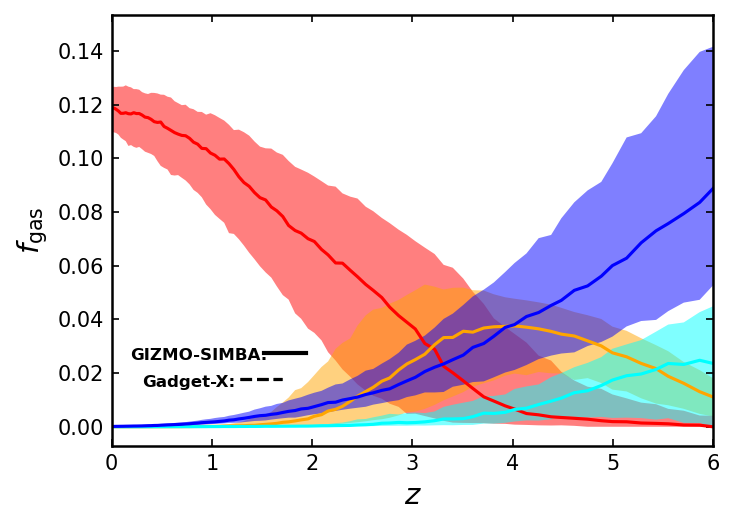

In [15]:
plt.figure(figsize = (5,3.6), dpi=150)
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally

lab = ['Hotfrac', 'Warmfrac_hot', 'Warmfrac_cold', 'Coldfrac']
leg = ['Hot (> $10^7$ K)', 'Warm-hot ($10^6 - 10^7$ K)', 'Warm-cold ($10^5 - 10^6$ K)', 'Cold (< $10^5$ K)']
col = ['r', 'orange', 'cyan', 'b']
nredz = 90

i0 = 0
for region in lab:
    value, redshifts = cal_sta_profiles(GIZd, nredz, region)
    ymed, yerr = cal_median(value, nredz)

    plt.plot(redshifts, ymed, label = leg[i0], c = col[i0])
    plt.fill_between(redshifts, yerr[0], yerr[1], alpha = 0.5, color = col[i0], edgecolor = None)
    i0 += 1
    
# i0 = 0
# for region in lab:
#     value, redshifts = cal_sta_profiles(G3Xd, nredz, region)
#     ymed, yerr = cal_median(value, nredz)
#     plt.plot(redshifts, ymed, ls = '--', c = col[i0])
#     i0 += 1

# plt.legend(fontsize = 'small', loc = 'upper center')

ax = plt.gca()
ax.text(0.18,0.025,'GIZMO-SIMBA:',weight = 'bold',size = 8) 
ax.text(0.3,0.015,'Gadget-X:',weight = 'bold',size = 8) 
from matplotlib.lines import Line2D
lin1 = Line2D([],[],c = 'k',lw = 2)
legend2 = ax.legend(handles=[lin1],frameon = False, loc = (0.24,0.17))
ax.add_artist(legend2)

lin0 = Line2D([],[],c = 'k',lw = 1.5, ls = '--')
legend0 = ax.legend(handles=[lin0],frameon = False, loc = (0.2,0.11))
ax.add_artist(legend0)

plt.xlabel(r'$z$', fontsize = 14)
plt.ylabel(r'$f_{\rm gas}$', fontsize = 14)
plt.xlim(0,6)
ax.set_yticks([0,0.02,0.04,0.06,0.08,0.10,0.12,0.14])

plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 10)
plt.tight_layout()

# value, redshifts = cal_sta_profiles(G3Xd, 'Hotfrac')
# plt.savefig('./figs/fgas_evo.pdf')

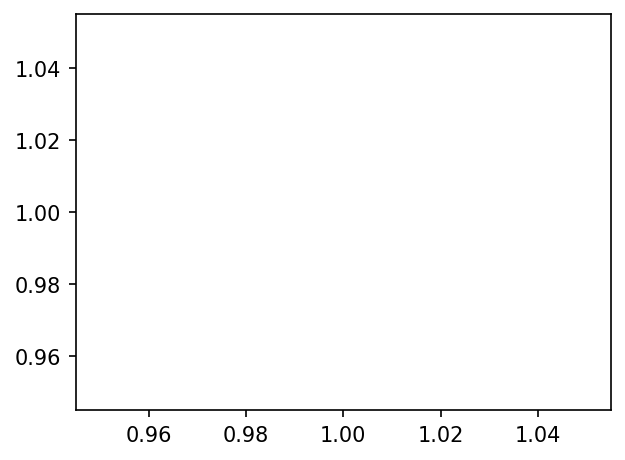

In [70]:
plt.figure(figsize = (4.6,3.5), dpi=150)
plt.plot(1,1)